In [117]:
!pip install "numpy<=2.1"

In [118]:
from ordinalgbt.lgb import LGBMOrdinal
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [119]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import shap
from shap import TreeExplainer
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

from ordinalgbt.data import make_ordinal_classification
from ordinalgbt.lgb import LGBMOrdinal

In [120]:
import warnings
warnings.filterwarnings("ignore")

In [121]:
test_df = pd.read_csv('/Users/liusiyi/Desktop/BT4240/Group Project/dataset/test_data_v3.csv')
valid_df = pd.read_csv('/Users/liusiyi/Desktop/BT4240/Group Project/dataset/validate_data_v3.csv')
train_df = pd.read_csv('/Users/liusiyi/Desktop/BT4240/Group Project/dataset/train_data_v3.csv')

In [122]:
train_df.columns

Index(['ID', 'End_Time', 'Distance(mi)', 'Description', 'Zipcode',
       'Weather_Timestamp', 'Temperature(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Amenity', 'Bump', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Station', 'Stop', 'Traffic_Calming',
       'Traffic_Signal', 'Duration', 'Region', 'State_CA', 'State_FL',
       'State_Others', 'State_TX', 'City_Charlotte', 'City_Houston',
       'City_Los Angeles', 'City_Miami', 'City_Orlando', 'City_Others',
       'Weather_Condition_Encoded', 'Weather_Condition_Fog / Low Visibility',
       'Weather_Condition_Others', 'Weather_Condition_Snow',
       'Weather_Condition_Thunderstorms / Severe Weather', 'Severity'],
      dtype='object')

In [123]:
train_df.dtypes

ID                                                   object
End_Time                                              int64
Distance(mi)                                        float64
Description                                          object
Zipcode                                              object
Weather_Timestamp                                    object
Temperature(F)                                      float64
Humidity(%)                                         float64
Pressure(in)                                        float64
Visibility(mi)                                      float64
Wind_Direction                                       object
Wind_Speed(mph)                                     float64
Precipitation(in)                                   float64
Amenity                                               int64
Bump                                                  int64
Crossing                                              int64
Give_Way                                

In [124]:
train_df.head()

,ID,End_Time,Distance(mi),Description,Zipcode,Weather_Timestamp,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),...,City_Los Angeles,City_Miami,City_Orlando,City_Others,Weather_Condition_Encoded,Weather_Condition_Fog / Low Visibility,Weather_Condition_Others,Weather_Condition_Snow,Weather_Condition_Thunderstorms / Severe Weather,Severity
0,A-547872,372,0.0,Crash on Hard Scrabble Rd at Clemson Rd.,29223-8559,2022-08-03 05:53:00,77.0,88.0,29.81,10.0,...,0,0,0,1,0,0,0,0,0,1
1,A-6997925,922,0.0,At OH-87/S Woodland Rd - Accident.,44022,2020-06-03 14:45:00,75.0,65.0,28.84,20.0,...,0,0,0,1,0,0,0,0,0,1
2,A-539957,649,0.0,Crash on Rosewood Ave at Nansemond St.,23221-3430,2022-08-11 09:54:00,79.0,84.0,29.80,10.0,...,0,0,0,1,0,0,0,0,0,1
3,A-556754,544,0.0,Crash on Gellhorn Dr at Loop Fwy.,77029,2022-07-25 07:53:00,82.0,79.0,29.98,10.0,...,0,0,0,0,0,0,0,0,0,1
4,A-7040745,993,0.0,At CR-676A/Bloomingdale Av/Progress BL - Accid...,33578,2020-05-20 15:55:00,86.0,55.0,29.91,10.0,...,0,0,0,1,0,0,0,0,0,1


In [125]:
train_df[['Description', 'Zipcode', 'Weather_Timestamp', 'Wind_Direction']]

,Description,Zipcode,Weather_Timestamp,Wind_Direction
0,Crash on Hard Scrabble Rd at Clemson Rd.,29223-8559,2022-08-03 05:53:00,CALM
1,At OH-87/S Woodland Rd - Accident.,44022,2020-06-03 14:45:00,W
2,Crash on Rosewood Ave at Nansemond St.,23221-3430,2022-08-11 09:54:00,VAR
3,Crash on Gellhorn Dr at Loop Fwy.,77029,2022-07-25 07:53:00,CALM
4,At CR-676A/Bloomingdale Av/Progress BL - Accid...,33578,2020-05-20 15:55:00,SW
...,...,...,...,...
7995,Incident on MI-55 EB near CAMPBELL RD Road clo...,48661-9084,2021-03-31 06:53:00,W
7996,Crash on WABASH AV / WATERDAM RD / JOFFRE CHER...,15021,2022-11-06 02:51:00,SSW
7997,At Pleasant Hill Rd - Accident.,38118-7412,2020-05-29 15:54:00,NW
7998,Closed at US-220-BR/VA-457/Memorial Blvd - Roa...,24089,2017-01-21 20:15:00,NNE


# Baseline Model

In [126]:
# Sample DataFrame
# train_df1 = pd.DataFrame({'timestamp': pd.to_datetime(['2025-03-07 14:30:00', '2024-12-25 08:15:00'])})
train_df['Weather_Timestamp'] = pd.to_datetime(train_df['Weather_Timestamp'])
# Extract components
train_df['weather_year'] = train_df['Weather_Timestamp'].dt.year
train_df['weather_month'] = train_df['Weather_Timestamp'].dt.month
train_df['weather_day'] = train_df['Weather_Timestamp'].dt.day
train_df['weather_day_of_week'] = train_df['Weather_Timestamp'].dt.day_name()  # Or .dt.weekday (0=Monday, 6=Sunday)
train_df['weather_hour'] = train_df['Weather_Timestamp'].dt.hour
train_df['weather_minute'] = train_df['Weather_Timestamp'].dt.minute
train_df['Wind_Direction'] = train_df['Wind_Direction'].astype('category')
train_df['weather_day_of_week'] = train_df['weather_day_of_week'].astype('category')

train_df[['Weather_Timestamp','weather_year','weather_month','weather_day_of_week']]

,Weather_Timestamp,weather_year,weather_month,weather_day_of_week
0,2022-08-03 05:53:00,2022,8,Wednesday
1,2020-06-03 14:45:00,2020,6,Wednesday
2,2022-08-11 09:54:00,2022,8,Thursday
3,2022-07-25 07:53:00,2022,7,Monday
4,2020-05-20 15:55:00,2020,5,Wednesday
...,...,...,...,...
7995,2021-03-31 06:53:00,2021,3,Wednesday
7996,2022-11-06 02:51:00,2022,11,Sunday
7997,2020-05-29 15:54:00,2020,5,Friday
7998,2017-01-21 20:15:00,2017,1,Saturday


In [127]:
valid_df['Weather_Timestamp'] = pd.to_datetime(valid_df['Weather_Timestamp'])
# Extract components
valid_df['weather_year'] = valid_df['Weather_Timestamp'].dt.year
valid_df['weather_month'] = valid_df['Weather_Timestamp'].dt.month
valid_df['weather_day'] = valid_df['Weather_Timestamp'].dt.day
valid_df['weather_day_of_week'] = valid_df['Weather_Timestamp'].dt.day_name()  # Or .dt.weekday (0=Monday, 6=Sunday)
valid_df['weather_hour'] = valid_df['Weather_Timestamp'].dt.hour
valid_df['weather_minute'] = valid_df['Weather_Timestamp'].dt.minute
valid_df['Wind_Direction'] = valid_df['Wind_Direction'].astype('category')
valid_df['weather_day_of_week'] = valid_df['weather_day_of_week'].astype('category')

In [128]:
test_df['Weather_Timestamp'] = pd.to_datetime(test_df['Weather_Timestamp'])
# Extract components
test_df['weather_year'] = test_df['Weather_Timestamp'].dt.year
test_df['weather_month'] = test_df['Weather_Timestamp'].dt.month
test_df['weather_day'] = test_df['Weather_Timestamp'].dt.day
test_df['weather_day_of_week'] = test_df['Weather_Timestamp'].dt.day_name()  # Or .dt.weekday (0=Monday, 6=Sunday)
test_df['weather_hour'] = test_df['Weather_Timestamp'].dt.hour
test_df['weather_minute'] = test_df['Weather_Timestamp'].dt.minute
test_df['Wind_Direction'] = test_df['Wind_Direction'].astype('category')
test_df['weather_day_of_week'] = test_df['weather_day_of_week'].astype('category')

In [129]:
train_X = train_df.drop(columns=['Severity','ID','Description','Weather_Timestamp','Zipcode'],inplace=False)
train_y = train_df['Severity']
valid_X = valid_df.drop(columns=['Severity','ID','Description','Weather_Timestamp','Zipcode'],inplace=False)
valid_y = valid_df['Severity']
test_X = test_df.drop(columns=['Severity','ID','Description','Weather_Timestamp','Zipcode'],inplace=False)
test_y = test_df['Severity']

In [130]:
print(train_X.shape)
print(test_X.shape)

(8000, 43)
(1000, 43)


In [131]:
print(train_y)

0       1
1       1
2       1
3       1
4       1
       ..
7995    4
7996    4
7997    4
7998    4
7999    4
Name: Severity, Length: 8000, dtype: int64


In [132]:
encoder = LabelEncoder()
train_y1 = encoder.fit_transform(train_y)
valid_y1 = encoder.transform(valid_y)
test_y1 = encoder.transform(test_y)


train_y1

array([0, 0, 0, ..., 3, 3, 3])

In [133]:
model = LGBMOrdinal()
model.fit(train_X, train_y1)

LGBMOrdinal(objective=<function LGBMOrdinal._lgb_loss_factory.<locals>.loss at 0x291987d00>)

In [134]:
y_pred = model.predict(valid_X)
y_pred_prob = model.predict_proba(valid_X)

## Model Evaluation

### Confusion Matrix

In [135]:
cm = confusion_matrix(valid_y1, y_pred)
print(cm)

[[ 14   0   0   0]
 [149 237 101 341]
 [ 17  20  25  62]
 [  1   1   1  31]]


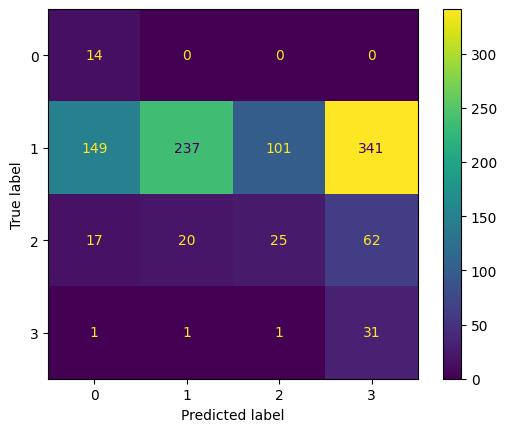

In [136]:
ConfusionMatrixDisplay.from_predictions(valid_y1, model.predict(valid_X))

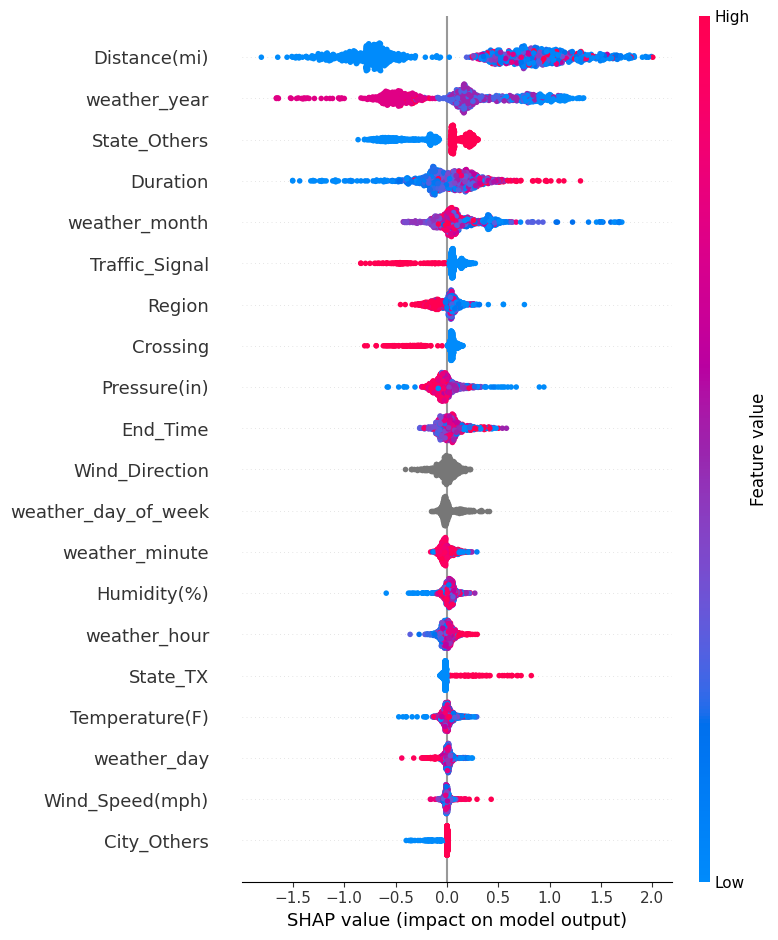

In [137]:
explainer = TreeExplainer(model, model_output='raw')
shap_values = explainer.shap_values(valid_X)
shap.summary_plot(shap_values,valid_X)

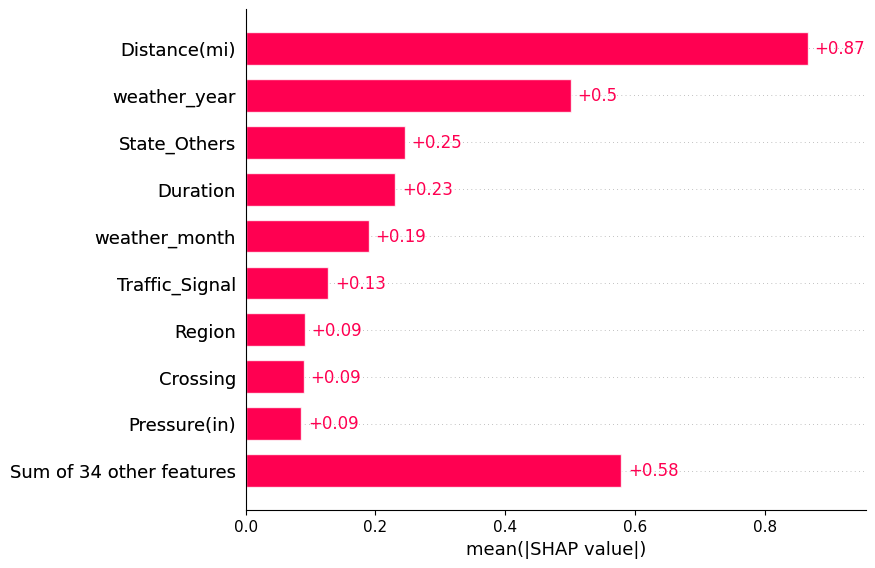

In [138]:
shap_values = explainer(valid_X)
shap.plots.bar(shap_values)

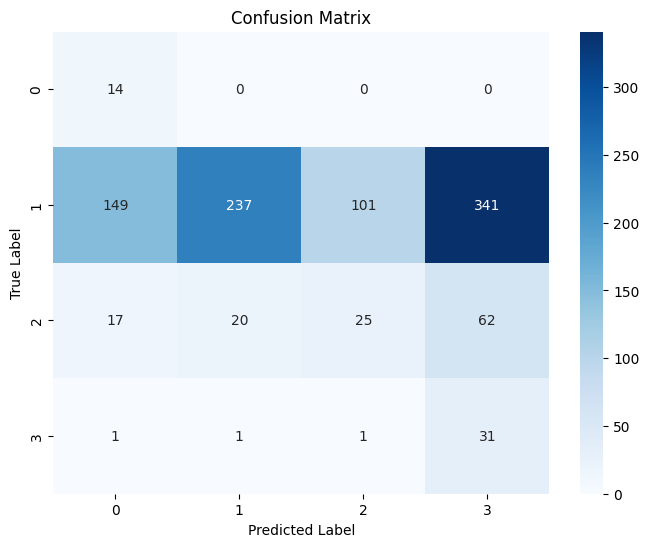

In [139]:
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=np.unique(train_y1), yticklabels=np.unique(train_y1))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

### Mean Average Error

In [140]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, f1_score, cohen_kappa_score
from scipy.stats import kendalltau

In [141]:
mae = mean_absolute_error(valid_y1, y_pred)
mse = mean_squared_error(valid_y1, y_pred)
tolerance_accuracy = np.mean(np.abs(valid_y1 - y_pred) <= 1)
f1_macro = f1_score(valid_y1, y_pred, average="macro")
f1_weighted = f1_score(valid_y1, y_pred, average="weighted")
tau, _ = kendalltau(valid_y1, y_pred)
kappa_weighted = cohen_kappa_score(valid_y1, y_pred, weights="quadratic")


print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Accuracy within 1 class:", tolerance_accuracy)
print("F1-score (Macro):", f1_macro)
print("F1-score (Weighted):", f1_weighted)
print("Kendall's Tau:", tau)
print("Weighted Kappa:", kappa_weighted)

Mean Absolute Error (MAE): 1.054
Mean Squared Error (MSE): 1.778
Accuracy within 1 class: 0.64
F1-score (Macro): 0.22793391292929055
F1-score (Weighted): 0.39260799032702365
Kendall's Tau: 0.18131801501602401
Weighted Kappa: 0.12336753087442354


### ROC

In [142]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

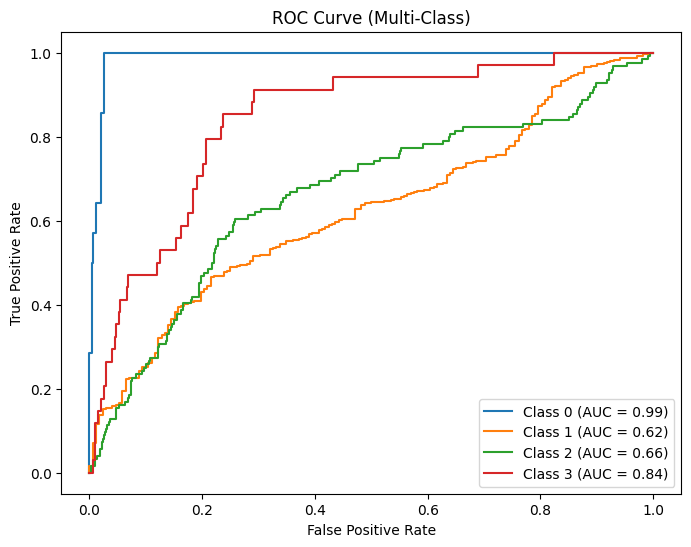

In [143]:
y_true_bin = label_binarize(valid_y1, classes=np.unique(valid_y1))

n_classes = y_true_bin.shape[1]
plt.figure(figsize=(8,6))

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {i} (AUC = {roc_auc:.2f})")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Multi-Class)")
plt.legend()
plt.show()

In [144]:
## Evaluate in-sample prediction error
train_y_pred = model.predict(train_X)

In [145]:
mae = mean_absolute_error(train_y1, train_y_pred)
mse = mean_squared_error(train_y1, train_y_pred)
tolerance_accuracy = np.mean(np.abs(train_y1 - train_y_pred) <= 1)
f1_macro = f1_score(train_y1, train_y_pred, average="macro")
f1_weighted = f1_score(train_y1, train_y_pred, average="weighted")
tau, _ = kendalltau(train_y1, train_y_pred)
kappa_weighted = cohen_kappa_score(train_y1, train_y_pred, weights="quadratic")


print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Accuracy within 1 class:", tolerance_accuracy)
print("F1-score (Macro):", f1_macro)
print("F1-score (Weighted):", f1_weighted)
print("Kendall's Tau:", tau)
print("Weighted Kappa:", kappa_weighted)

Mean Absolute Error (MAE): 0.48625
Mean Squared Error (MSE): 0.73075
Accuracy within 1 class: 0.8875
F1-score (Macro): 0.5878437292171326
F1-score (Weighted): 0.5878437292171325
Kendall's Tau: 0.7130193617949437
Weighted Kappa: 0.7603901959176982


# Fine-tuning

In [146]:
!pip install scikit-optimize

In [147]:
from sklearn.model_selection import KFold, StratifiedKFold, RandomizedSearchCV
from skopt import BayesSearchCV
from skopt.callbacks import DeadlineStopper, DeltaYStopper
from skopt.space import Real, Categorical, Integer

from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import make_scorer

In [157]:
def evaluate_results(y_pred, y_pred_prob, y_true):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    tolerance_accuracy = np.mean(np.abs(y_true - y_pred) <= 1)
    f1_macro = f1_score(y_true, y_pred, average="macro")
    f1_weighted = f1_score(y_true, y_pred, average="weighted")
    tau, _ = kendalltau(y_true, y_pred)
    kappa_weighted = cohen_kappa_score(y_true, y_pred, weights="quadratic")


    print("Mean Absolute Error (MAE):", mae)
    print("Mean Squared Error (MSE):", mse)
    print("Accuracy within 1 class:", tolerance_accuracy)
    print("F1-score (Macro):", f1_macro)
    print("F1-score (Weighted):", f1_weighted)
    print("Kendall's Tau:", tau)
    print("Weighted Kappa:", kappa_weighted)

    ConfusionMatrixDisplay.from_predictions(y_true, y_pred)

    y_true_bin = label_binarize(y_true, classes=np.unique(y_true))

    n_classes = y_true_bin.shape[1]
    plt.figure(figsize=(8,6))

    for i in range(n_classes):
        fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_pred_prob[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"Class {i} (AUC = {roc_auc:.2f})")

    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve (Multi-Class)")
    plt.legend()
    plt.show()

def tune_evaluate(scoring, search_spaces, train_X, train_y, test_X, test_y):
    model = LGBMOrdinal()
    opt = BayesSearchCV(estimator=model,                                    
                    search_spaces=search_spaces,                      
                    scoring=scoring,                           
                    cv=5,                                           
                    n_iter=60,
                    n_points=3,
                    n_jobs=-1,
                    iid=False,
                    return_train_score=False,                         
                    refit=True,                                      
                    optimizer_kwargs={'base_estimator': 'GP'},        
                    random_state=42)
    
    opt.fit(train_X, train_y)
    best_model = opt.best_estimator_
    print("Best optimzer score: ", opt.best_score_)
    print("Best parameters: ", opt.best_params_)

    y_pred = best_model.predict(test_X)
    y_pred_prob = best_model.predict_proba(test_X)

    evaluate_results(y_pred, y_pred_prob, test_y)

    return best_model, opt.best_params_
    

In [161]:
def random_search_evaluate(search_spaces, train_X, train_y, test_X, test_y):
    model = LGBMOrdinal()
    random_search = RandomizedSearchCV(model, param_distributions=search_spaces, n_iter=20, cv=5, scoring="accuracy", random_state=42)
    random_search.fit(train_X, train_y)
    
    best_model = random_search.best_estimator_
    print("Best parameters: ", random_search.best_params_)

    y_pred = best_model.predict(test_X)
    y_pred_prob = best_model.predict_proba(test_X)

    evaluate_results(y_pred, y_pred_prob, test_y)

    return best_model, random_search.best_params_

/Users/liusiyi/Desktop/BT4240/Group Project/.venv/lib/python3.10/site-packages/ordinalgbt/loss.py:70: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
/Users/liusiyi/Desktop/BT4240/Group Project/.venv/lib/python3.10/site-packages/ordinalgbt/loss.py:70: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
/Users/liusiyi/Desktop/BT4240/Group Project/.venv/lib/python3.10/site-packages/ordinalgbt/loss.py:70: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
/Users/liusiyi/Desktop/BT4240/Group Project/.venv/lib/python3.10/site-packages/ordinalgbt/loss.py:70: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
/Users/liusiyi/Desktop/BT4240/Group Project/.venv/lib/python3.10/site-packages/ordinalgbt/loss.py:70: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
/Users/liusiyi/Desktop/BT4240/Group Project/.venv/lib/python3.10/site-packages/ordinalgbt/loss.py:70: RuntimeWarning: ov

Best optimzer score:  -0.9561250000000001
Best parameters:  OrderedDict([('colsample_bytree', 1.0), ('learning_rate', 0.3136143736984672), ('max_depth', 38), ('n_estimators', 2111), ('num_leaves', 226), ('reg_alpha', 0.0006135829583939824), ('reg_lambda', 2.1770953141107157e-06), ('subsample', 0.9889829349643213), ('subsample_freq', 4)])
Mean Absolute Error (MAE): 1.163
Mean Squared Error (MSE): 2.025
Accuracy within 1 class: 0.571
F1-score (Macro): 0.23470752714220713
F1-score (Weighted): 0.32594097617152984
Kendall's Tau: 0.049932414211349994
Weighted Kappa: 0.056786571994433044


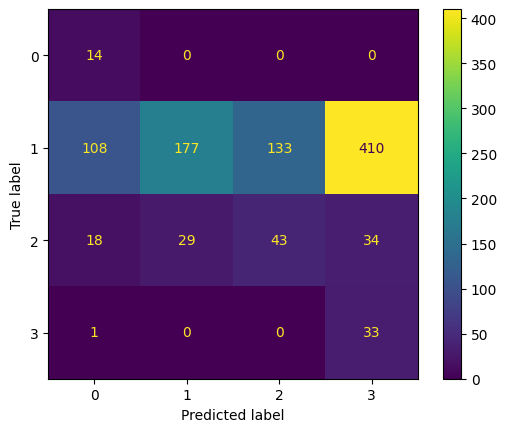

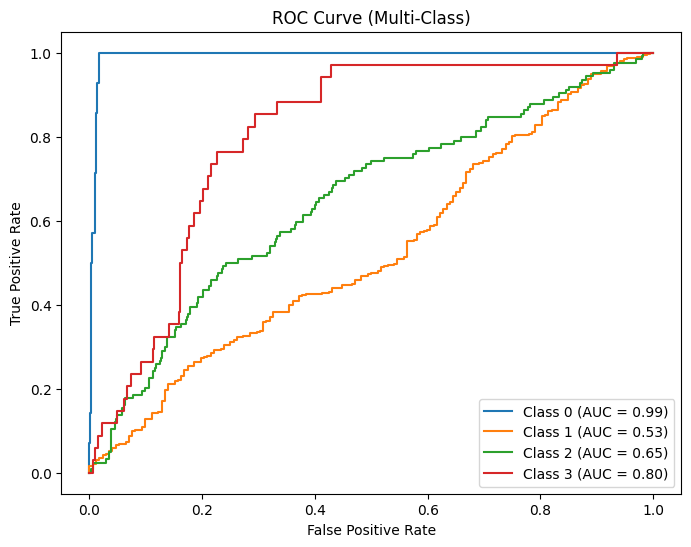

(LGBMOrdinal(learning_rate=0.3136143736984672, max_depth=38, n_estimators=2111,
             num_leaves=226,
             objective=<function LGBMOrdinal._lgb_loss_factory.<locals>.loss at 0x291895870>,
             reg_alpha=0.0006135829583939824, reg_lambda=2.1770953141107157e-06,
             subsample=0.9889829349643213, subsample_freq=4),
 OrderedDict([('colsample_bytree', 1.0),
              ('learning_rate', 0.3136143736984672),
              ('max_depth', 38),
              ('n_estimators', 2111),
              ('num_leaves', 226),
              ('reg_alpha', 0.0006135829583939824),
              ('reg_lambda', 2.1770953141107157e-06),
              ('subsample', 0.9889829349643213),
              ('subsample_freq', 4)]))

In [ ]:
scoring_mse = make_scorer(mean_squared_error, greater_is_better=False)
scoring_f1 = make_scorer(f1_score, average="macro", greater_is_better=False)
scoring_mae = make_scorer(mean_absolute_error, greater_is_better=False)

search_spaces = {
    'learning_rate': Real(0.01, 1.0, 'log-uniform'),
    'n_estimators': Integer(30, 5000),
    'num_leaves': Integer(2, 512),                       # Maximum tree leaves for base learners
    'max_depth': Integer(-1, 256),                       # Maximum tree depth for base learners, <=0 means no limit
    'subsample': Real(0.01, 1.0, 'uniform'),             # Subsample ratio of the training instance
    'subsample_freq': Integer(1, 10),                    # Frequency of subsample, <=0 means no enable
    'colsample_bytree': Real(0.01, 1.0, 'uniform'),      # Subsample ratio of columns when constructing each tree
    'reg_lambda': Real(1e-9, 100.0, 'log-uniform'),      # L2 regularization
    'reg_alpha': Real(1e-9, 100.0, 'log-uniform'),       # L1 regularization
   }

tune_evaluate(scoring_mae, search_spaces, train_X, train_y1, valid_X, valid_y1)

/Users/liusiyi/Desktop/BT4240/Group Project/.venv/lib/python3.10/site-packages/ordinalgbt/loss.py:70: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
/Users/liusiyi/Desktop/BT4240/Group Project/.venv/lib/python3.10/site-packages/ordinalgbt/loss.py:70: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
/Users/liusiyi/Desktop/BT4240/Group Project/.venv/lib/python3.10/site-packages/ordinalgbt/loss.py:70: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
/Users/liusiyi/Desktop/BT4240/Group Project/.venv/lib/python3.10/site-packages/ordinalgbt/loss.py:70: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
/Users/liusiyi/Desktop/BT4240/Group Project/.venv/lib/python3.10/site-packages/ordinalgbt/loss.py:70: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
/Users/liusiyi/Desktop/BT4240/Group Project/.venv/lib/python3.10/site-packages/ordinalgbt/loss.py:70: RuntimeWarning: ov

Best optimzer score:  0.17397685333184273
Best parameters:  OrderedDict([('colsample_bytree', 0.9539453486878958), ('learning_rate', 0.18188719813774157), ('max_depth', 254), ('n_estimators', 3841), ('num_leaves', 200), ('reg_alpha', 0.0047921545151731505), ('reg_lambda', 3.5588152667971476e-08), ('subsample', 0.057339746005952645), ('subsample_freq', 7)])
Mean Absolute Error (MAE): 1.73
Mean Squared Error (MSE): 3.286
Accuracy within 1 class: 0.25
F1-score (Macro): 0.031646617371151084
F1-score (Weighted): 0.0030844277673545964
Kendall's Tau: -0.018786397759109046
Weighted Kappa: -0.004217346127987298


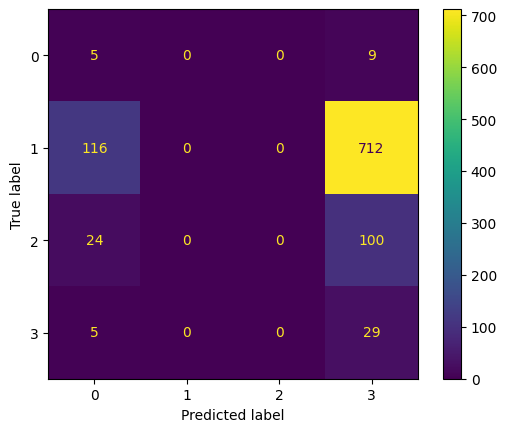

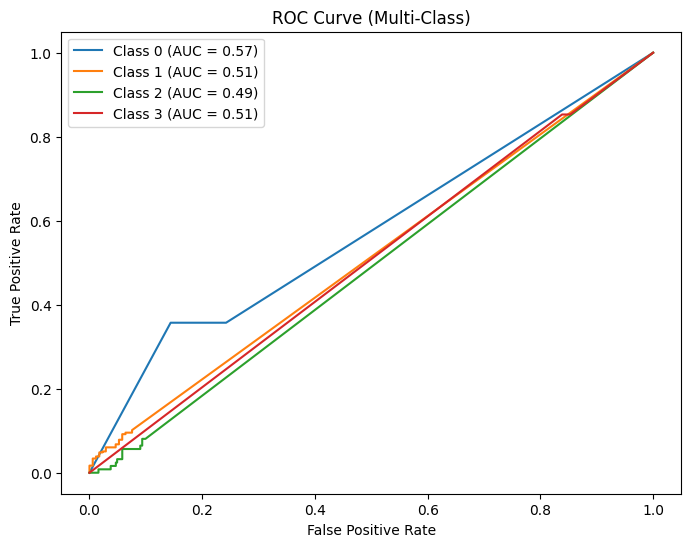

(LGBMOrdinal(colsample_bytree=0.9539453486878958,
             learning_rate=0.18188719813774157, max_depth=254, n_estimators=3841,
             num_leaves=200,
             objective=<function LGBMOrdinal._lgb_loss_factory.<locals>.loss at 0x291d4e0e0>,
             reg_alpha=0.0047921545151731505, reg_lambda=3.5588152667971476e-08,
             subsample=0.057339746005952645, subsample_freq=7),
 OrderedDict([('colsample_bytree', 0.9539453486878958),
              ('learning_rate', 0.18188719813774157),
              ('max_depth', 254),
              ('n_estimators', 3841),
              ('num_leaves', 200),
              ('reg_alpha', 0.0047921545151731505),
              ('reg_lambda', 3.5588152667971476e-08),
              ('subsample', 0.057339746005952645),
              ('subsample_freq', 7)]))

In [ ]:

scoring_f1 = make_scorer(f1_score, average="macro", greater_is_better=True)
tune_evaluate(scoring_f1, search_spaces, train_X, train_y1, valid_X, valid_y1)

# Feature Selection

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector, RFE
from sklearn.preprocessing import OneHotEncoder

In [167]:
encoder = OneHotEncoder(drop='first', sparse_output=False)
cat_encoded = encoder.fit_transform(train_X[['Wind_Direction','weather_day_of_week']])
cat_encoded = pd.DataFrame(cat_encoded, columns=encoder.get_feature_names_out())
cat_encoded

,Wind_Direction_E,Wind_Direction_ENE,Wind_Direction_ESE,Wind_Direction_East,Wind_Direction_N,Wind_Direction_NE,Wind_Direction_NNE,Wind_Direction_NNW,Wind_Direction_NW,Wind_Direction_North,...,Wind_Direction_W,Wind_Direction_WNW,Wind_Direction_WSW,Wind_Direction_West,weather_day_of_week_Monday,weather_day_of_week_Saturday,weather_day_of_week_Sunday,weather_day_of_week_Thursday,weather_day_of_week_Tuesday,weather_day_of_week_Wednesday
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7998,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [166]:
train_X.columns

Index(['End_Time', 'Distance(mi)', 'Temperature(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Amenity', 'Bump', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Station', 'Stop', 'Traffic_Calming',
       'Traffic_Signal', 'Duration', 'Region', 'State_CA', 'State_FL',
       'State_Others', 'State_TX', 'City_Charlotte', 'City_Houston',
       'City_Los Angeles', 'City_Miami', 'City_Orlando', 'City_Others',
       'Weather_Condition_Encoded', 'Weather_Condition_Fog / Low Visibility',
       'Weather_Condition_Others', 'Weather_Condition_Snow',
       'Weather_Condition_Thunderstorms / Severe Weather', 'weather_year',
       'weather_month', 'weather_day', 'weather_day_of_week', 'weather_hour',
       'weather_minute'],
      dtype='object')

In [168]:
train_X = pd.concat([cat_encoded, train_X], axis=1)
train_X.drop(columns=['Wind_Direction','weather_day_of_week'],inplace=True)

In [169]:
train_X.shape

(8000, 69)

In [170]:
cat_encoded = encoder.transform(valid_X[['Wind_Direction','weather_day_of_week']])
cat_encoded = pd.DataFrame(cat_encoded, columns=encoder.get_feature_names_out())
valid_X = pd.concat([cat_encoded, valid_X], axis=1)
valid_X.drop(columns=['Wind_Direction','weather_day_of_week'],inplace=True)
valid_X.shape

(1000, 69)

In [177]:
cat_encoded = encoder.transform(test_X[['Wind_Direction','weather_day_of_week']])
cat_encoded = pd.DataFrame(cat_encoded, columns=encoder.get_feature_names_out())
test_X = pd.concat([cat_encoded, test_X], axis=1)
test_X.drop(columns=['Wind_Direction','weather_day_of_week'],inplace=True)
test_X.shape

(1000, 69)

In [171]:
def feature_selection_evaluate(n_features, train_X, train_y, test_X, test_y):
    model = LGBMOrdinal()
    selector = RFE(model, n_features_to_select=n_features, step=1)
    selector = selector.fit(train_X, train_y)
    selector.get_support()
    selector.transform(train_X).shape
    selected_features = train_X.columns[selector.support_]

    model.fit(train_X[selected_features], train_y)
    y_pred = model.predict(test_X[selected_features])
    y_pred_prob = model.predict_proba(test_X[selected_features])

    print("Selected features: ", selected_features)
    evaluate_results(y_pred, y_pred_prob, test_y)

    return selected_features

Selected features:  Index(['Wind_Direction_NE', 'weather_day_of_week_Saturday',
       'weather_day_of_week_Sunday', 'weather_day_of_week_Thursday',
       'End_Time', 'Distance(mi)', 'Temperature(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Crossing', 'Stop', 'Traffic_Signal', 'Duration',
       'Region', 'State_Others', 'State_TX', 'City_Charlotte', 'weather_year',
       'weather_month', 'weather_day', 'weather_hour', 'weather_minute'],
      dtype='object')
Mean Absolute Error (MAE): 1.018
Mean Squared Error (MSE): 1.708
Accuracy within 1 class: 0.655
F1-score (Macro): 0.24463270666874742
F1-score (Weighted): 0.4135138129604299
Kendall's Tau: 0.18561400137553694
Weighted Kappa: 0.12670364371144827


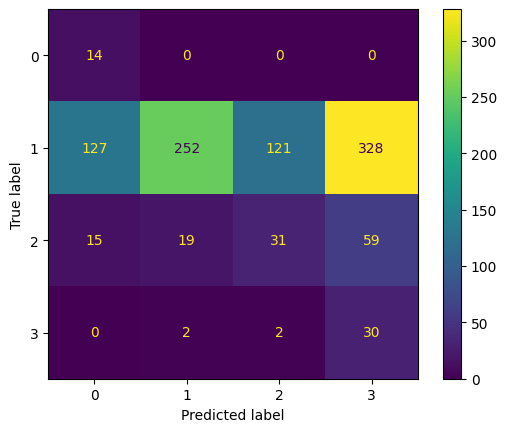

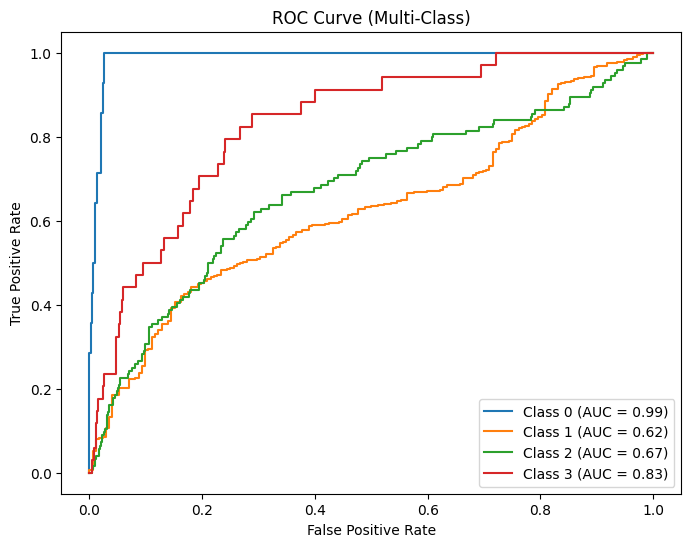

In [173]:
selected_features = feature_selection_evaluate(25, train_X, train_y1, valid_X, valid_y1)

Selected features:  Index(['End_Time', 'Distance(mi)', 'Temperature(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Traffic_Signal',
       'Duration', 'Region', 'weather_year', 'weather_month', 'weather_day',
       'weather_hour', 'weather_minute'],
      dtype='object')
Mean Absolute Error (MAE): 1.133
Mean Squared Error (MSE): 1.939
Accuracy within 1 class: 0.597
F1-score (Macro): 0.21532661213144283
F1-score (Weighted): 0.3456275802316605
Kendall's Tau: 0.13421086536080115
Weighted Kappa: 0.08759639292362531


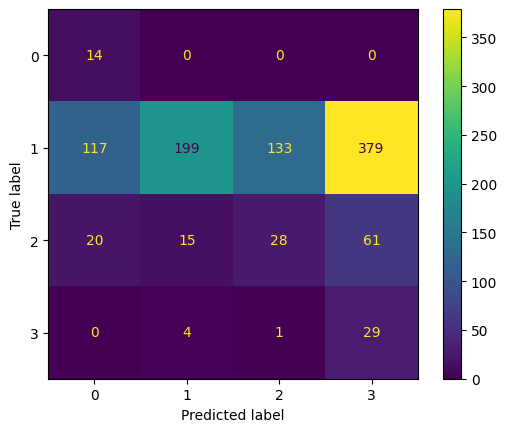

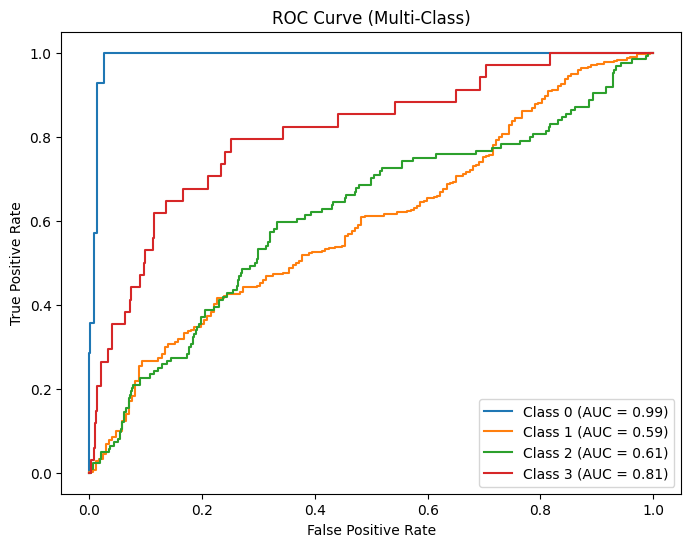

In [174]:
selected_features = feature_selection_evaluate(15, train_X, train_y1, valid_X, valid_y1)

Selected features:  Index(['End_Time', 'Distance(mi)', 'Temperature(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Crossing', 'Stop', 'Traffic_Signal', 'Duration',
       'Region', 'State_Others', 'State_TX', 'weather_year', 'weather_month',
       'weather_day', 'weather_hour', 'weather_minute'],
      dtype='object')
Mean Absolute Error (MAE): 1.027
Mean Squared Error (MSE): 1.753
Accuracy within 1 class: 0.637
F1-score (Macro): 0.2589409835529644
F1-score (Weighted): 0.42261709190000346
Kendall's Tau: 0.16720624902224737
Weighted Kappa: 0.11834939717831572


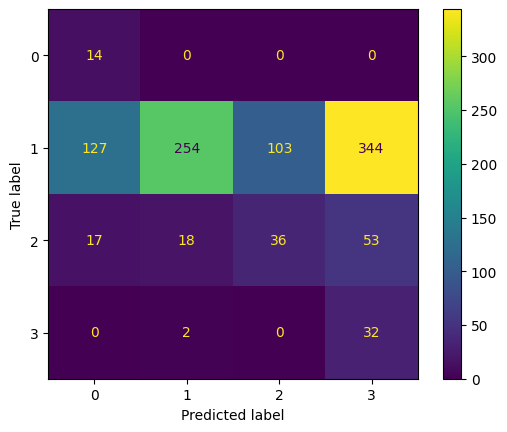

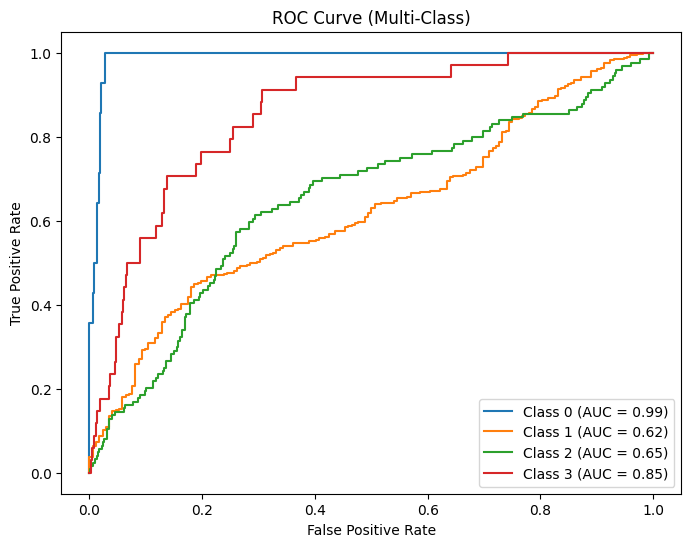

In [175]:
selected_features = feature_selection_evaluate(20, train_X, train_y1, valid_X, valid_y1)

Selected features:  Index(['weather_day_of_week_Saturday', 'End_Time', 'Distance(mi)',
       'Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Crossing', 'Stop',
       'Traffic_Signal', 'Duration', 'Region', 'State_Others', 'State_TX',
       'City_Charlotte', 'weather_year', 'weather_month', 'weather_day',
       'weather_hour', 'weather_minute'],
      dtype='object')
Mean Absolute Error (MAE): 1.02
Mean Squared Error (MSE): 1.73
Accuracy within 1 class: 0.645
F1-score (Macro): 0.2508216253829926
F1-score (Weighted): 0.4237690973497027
Kendall's Tau: 0.1820598820398306
Weighted Kappa: 0.12485886452208195


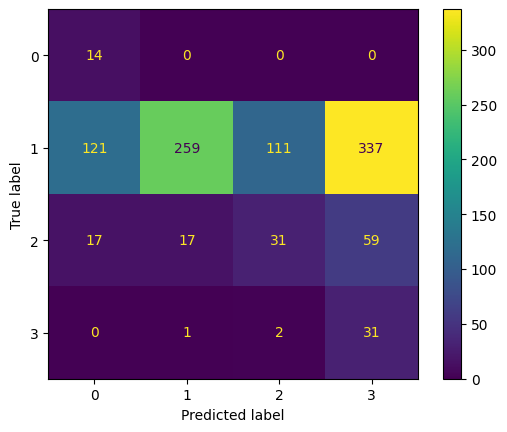

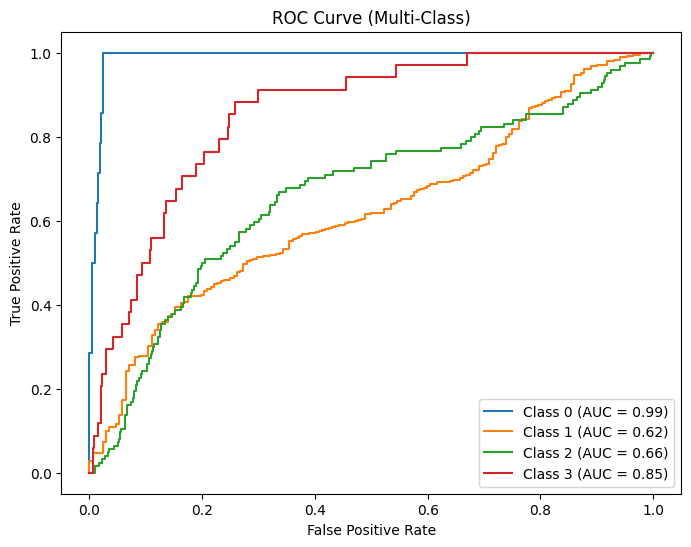

In [176]:
selected_features = feature_selection_evaluate(22, train_X, train_y1, valid_X, valid_y1)

In [ ]:
model = LGBMOrdinal()


selector = RFE(model, n_features_to_select=20, step=1)
selector = selector.fit(train_X, train_y1)
selector.get_support()
selector.transform(train_X).shape

(8000, 20)

In [ ]:
selected_features = train_X.columns[selector.support_]
print(selected_features)

Index(['End_Time', 'Distance(mi)', 'Temperature(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Crossing', 'Stop', 'Traffic_Signal', 'Duration',
       'Region', 'State_Others', 'State_TX', 'weather_year', 'weather_month',
       'weather_day', 'weather_hour', 'weather_minute'],
      dtype='object')


In [152]:
model.fit(train_X[selected_features], train_y1)
y_pred = model.predict(valid_X[selected_features])
y_pred_prob = model.predict_proba(valid_X[selected_features])

In [153]:
mae = mean_absolute_error(valid_y1, y_pred)
mse = mean_squared_error(valid_y1, y_pred)
tolerance_accuracy = np.mean(np.abs(valid_y1 - y_pred) <= 1)
f1_macro = f1_score(valid_y1, y_pred, average="macro")
f1_weighted = f1_score(valid_y1, y_pred, average="weighted")
tau, _ = kendalltau(valid_y1, y_pred)
kappa_weighted = cohen_kappa_score(valid_y1, y_pred, weights="quadratic")


print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Accuracy within 1 class:", tolerance_accuracy)
print("F1-score (Macro):", f1_macro)
print("F1-score (Weighted):", f1_weighted)
print("Kendall's Tau:", tau)
print("Weighted Kappa:", kappa_weighted)

Mean Absolute Error (MAE): 1.027
Mean Squared Error (MSE): 1.753
Accuracy within 1 class: 0.637
F1-score (Macro): 0.2589409835529644
F1-score (Weighted): 0.42261709190000346
Kendall's Tau: 0.16720624902224737
Weighted Kappa: 0.11834939717831572


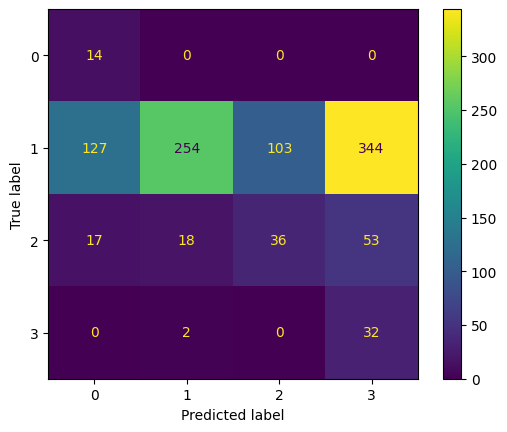

In [154]:
ConfusionMatrixDisplay.from_predictions(valid_y1, y_pred)

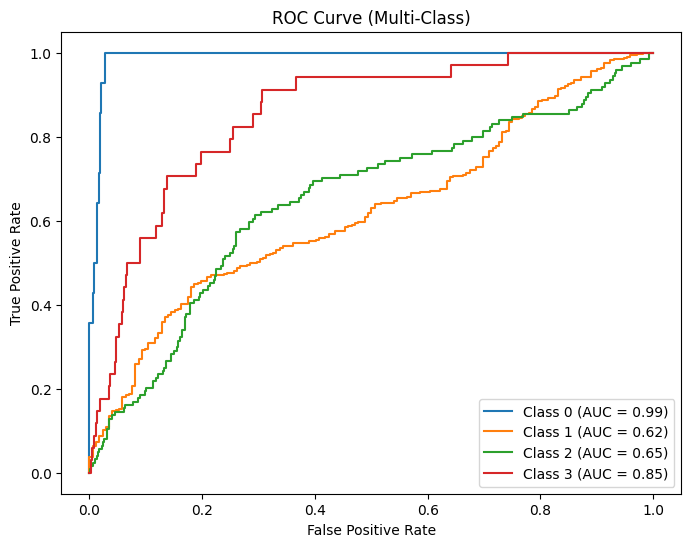

In [155]:
y_true_bin = label_binarize(valid_y1, classes=np.unique(valid_y1))

n_classes = y_true_bin.shape[1]
plt.figure(figsize=(8,6))

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {i} (AUC = {roc_auc:.2f})")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Multi-Class)")
plt.legend()
plt.show()

# Feature Selection + Fine-tuning

/Users/liusiyi/Desktop/BT4240/Group Project/.venv/lib/python3.10/site-packages/ordinalgbt/loss.py:70: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
/Users/liusiyi/Desktop/BT4240/Group Project/.venv/lib/python3.10/site-packages/ordinalgbt/loss.py:70: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
/Users/liusiyi/Desktop/BT4240/Group Project/.venv/lib/python3.10/site-packages/ordinalgbt/loss.py:70: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
/Users/liusiyi/Desktop/BT4240/Group Project/.venv/lib/python3.10/site-packages/ordinalgbt/loss.py:70: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
/Users/liusiyi/Desktop/BT4240/Group Project/.venv/lib/python3.10/site-packages/ordinalgbt/loss.py:70: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
/Users/liusiyi/Desktop/BT4240/Group Project/.venv/lib/python3.10/site-packages/ordinalgbt/loss.py:70: RuntimeWarning: ov

Best optimzer score:  -0.9349999999999999
Best parameters:  OrderedDict([('colsample_bytree', 0.9495900102261501), ('learning_rate', 0.4927624032406832), ('max_depth', 77), ('n_estimators', 2382), ('num_leaves', 247), ('reg_alpha', 4.562643186108639e-05), ('reg_lambda', 3.5289080518164016e-05), ('subsample', 1.0), ('subsample_freq', 4)])
Mean Absolute Error (MAE): 1.114
Mean Squared Error (MSE): 1.888
Accuracy within 1 class: 0.613
F1-score (Macro): 0.22830343333262057
F1-score (Weighted): 0.33304963877814675
Kendall's Tau: 0.0700355072945754
Weighted Kappa: 0.06906658146259104


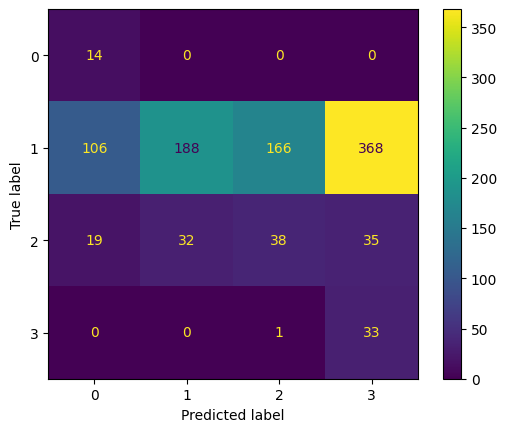

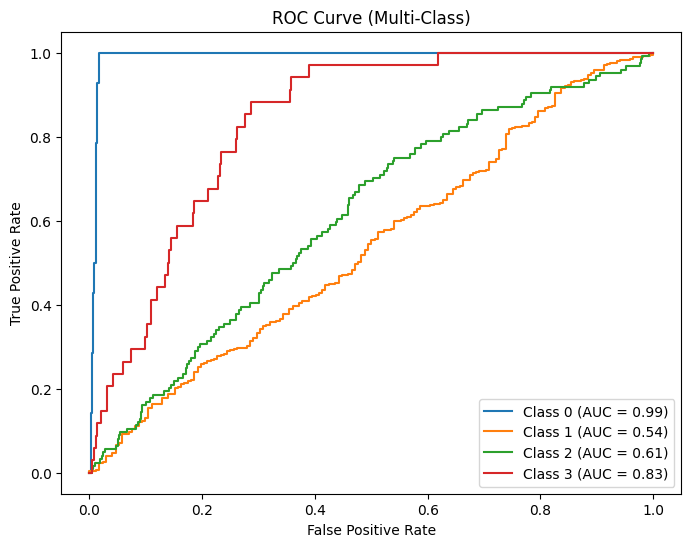

(LGBMOrdinal(colsample_bytree=0.9495900102261501,
             learning_rate=0.4927624032406832, max_depth=77, n_estimators=2382,
             num_leaves=247,
             objective=<function LGBMOrdinal._lgb_loss_factory.<locals>.loss at 0x287400160>,
             reg_alpha=4.562643186108639e-05, reg_lambda=3.5289080518164016e-05,
             subsample_freq=4),
 OrderedDict([('colsample_bytree', 0.9495900102261501),
              ('learning_rate', 0.4927624032406832),
              ('max_depth', 77),
              ('n_estimators', 2382),
              ('num_leaves', 247),
              ('reg_alpha', 4.562643186108639e-05),
              ('reg_lambda', 3.5289080518164016e-05),
              ('subsample', 1.0),
              ('subsample_freq', 4)]))

In [ ]:
scoring_mse = make_scorer(mean_squared_error, greater_is_better=False)
scoring_f1 = make_scorer(f1_score, average="macro", greater_is_better=False)
scoring_mae = make_scorer(mean_absolute_error, greater_is_better=False)

search_spaces = {
    'learning_rate': Real(0.01, 1.0, 'log-uniform'),
    'n_estimators': Integer(30, 5000),
    'num_leaves': Integer(2, 512),                       # Maximum tree leaves for base learners
    'max_depth': Integer(-1, 256),                       # Maximum tree depth for base learners, <=0 means no limit
    'subsample': Real(0.01, 1.0, 'uniform'),             # Subsample ratio of the training instance
    'subsample_freq': Integer(1, 10),                    # Frequency of subsample, <=0 means no enable
    'colsample_bytree': Real(0.01, 1.0, 'uniform'),      # Subsample ratio of columns when constructing each tree
    'reg_lambda': Real(1e-9, 100.0, 'log-uniform'),      # L2 regularization
    'reg_alpha': Real(1e-9, 100.0, 'log-uniform'),       # L1 regularization
   }

tune_evaluate(scoring_mae, search_spaces, train_X[selected_features], train_y1, valid_X[selected_features], valid_y1)

/Users/liusiyi/Desktop/BT4240/Group Project/.venv/lib/python3.10/site-packages/ordinalgbt/loss.py:70: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
/Users/liusiyi/Desktop/BT4240/Group Project/.venv/lib/python3.10/site-packages/ordinalgbt/loss.py:70: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
/Users/liusiyi/Desktop/BT4240/Group Project/.venv/lib/python3.10/site-packages/ordinalgbt/loss.py:70: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
/Users/liusiyi/Desktop/BT4240/Group Project/.venv/lib/python3.10/site-packages/ordinalgbt/loss.py:70: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
/Users/liusiyi/Desktop/BT4240/Group Project/.venv/lib/python3.10/site-packages/ordinalgbt/loss.py:70: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
/Users/liusiyi/Desktop/BT4240/Group Project/.venv/lib/python3.10/site-packages/ordinalgbt/loss.py:70: RuntimeWarning: ov

Best optimzer score:  -1.5391249999999999
Best parameters:  OrderedDict([('colsample_bytree', 1.0), ('learning_rate', 0.34034850708656134), ('max_depth', -1), ('n_estimators', 30), ('num_leaves', 297), ('reg_alpha', 0.022519318947718015), ('reg_lambda', 1e-09), ('subsample', 0.999910044418488), ('subsample_freq', 1)])
Mean Absolute Error (MAE): 0.866
Mean Squared Error (MSE): 1.376
Accuracy within 1 class: 0.745
F1-score (Macro): 0.29052493526541323
F1-score (Weighted): 0.46463081993677585
Kendall's Tau: 0.1432639052520279
Weighted Kappa: 0.12074879486353718


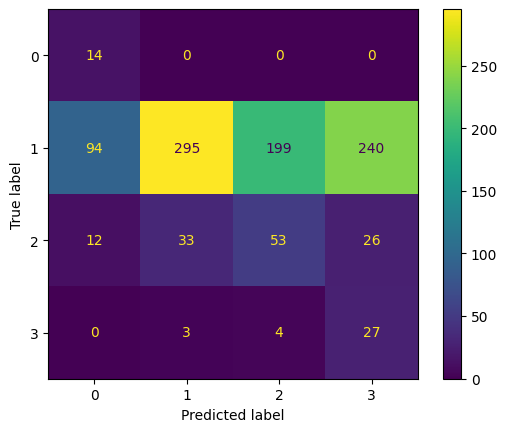

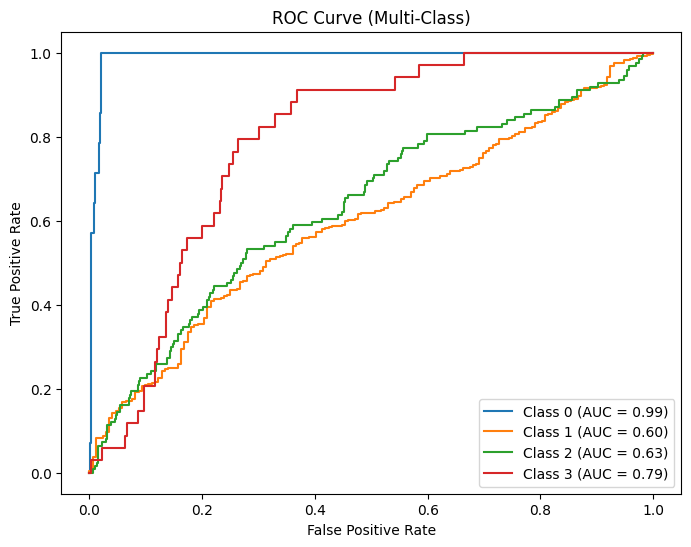

(LGBMOrdinal(learning_rate=0.34034850708656134, n_estimators=30, num_leaves=297,
             objective=<function LGBMOrdinal._lgb_loss_factory.<locals>.loss at 0x28fe10dc0>,
             reg_alpha=0.022519318947718015, reg_lambda=1e-09,
             subsample=0.999910044418488, subsample_freq=1),
 OrderedDict([('colsample_bytree', 1.0),
              ('learning_rate', 0.34034850708656134),
              ('max_depth', -1),
              ('n_estimators', 30),
              ('num_leaves', 297),
              ('reg_alpha', 0.022519318947718015),
              ('reg_lambda', 1e-09),
              ('subsample', 0.999910044418488),
              ('subsample_freq', 1)]))

In [113]:
tune_evaluate(scoring_mse, search_spaces, train_X[selected_features], train_y1, valid_X[selected_features], valid_y1)

In [159]:
from scipy.stats import uniform, loguniform, randint

Best parameters:  {'colsample_bytree': np.float64(0.9659757127438138), 'learning_rate': np.float64(0.4138040112561014), 'max_depth': 51, 'n_estimators': 1393, 'num_leaves': 93, 'reg_alpha': np.float64(6.945082853205809e-05), 'reg_lambda': np.float64(2.199989374596606e-08), 'subsample': np.float64(0.5002251410101575), 'subsample_freq': 3}
Mean Absolute Error (MAE): 1.203
Mean Squared Error (MSE): 2.035
Accuracy within 1 class: 0.586
F1-score (Macro): 0.16522016924545507
F1-score (Weighted): 0.27128023070600127
Kendall's Tau: 0.0962173690584986
Weighted Kappa: 0.07530430894560158


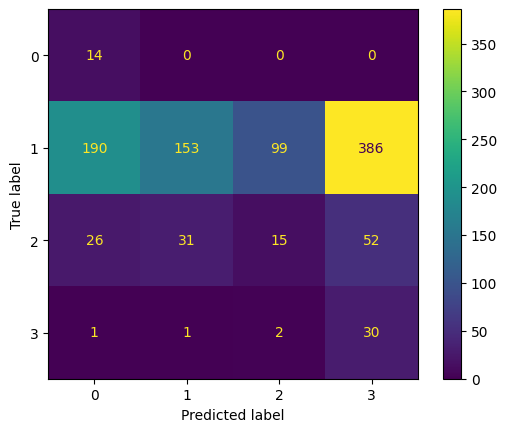

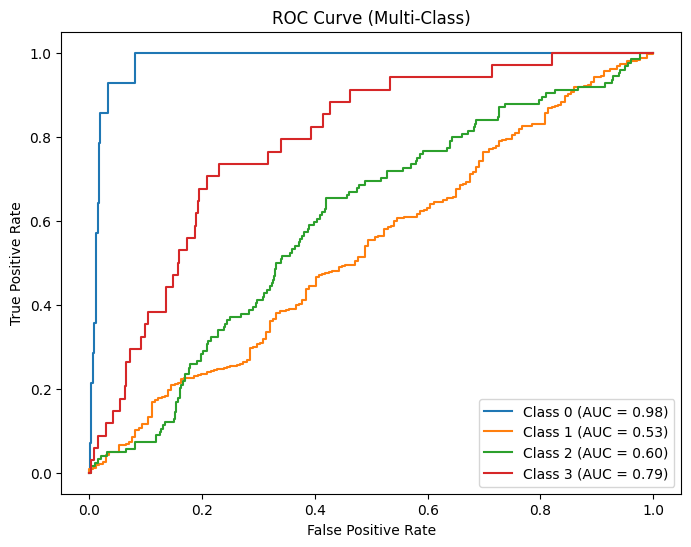

(LGBMOrdinal(colsample_bytree=np.float64(0.9659757127438138),
             learning_rate=np.float64(0.4138040112561014), max_depth=51,
             n_estimators=1393, num_leaves=93,
             objective=<function LGBMOrdinal._lgb_loss_factory.<locals>.loss at 0x2927af400>,
             reg_alpha=np.float64(6.945082853205809e-05),
             reg_lambda=np.float64(2.199989374596606e-08),
             subsample=np.float64(0.5002251410101575), subsample_freq=3),
 {'colsample_bytree': np.float64(0.9659757127438138),
  'learning_rate': np.float64(0.4138040112561014),
  'max_depth': 51,
  'n_estimators': 1393,
  'num_leaves': 93,
  'reg_alpha': np.float64(6.945082853205809e-05),
  'reg_lambda': np.float64(2.199989374596606e-08),
  'subsample': np.float64(0.5002251410101575),
  'subsample_freq': 3})

In [ ]:
search_spaces = {
    'learning_rate': loguniform(0.001, 1.0),   # Log-uniform scale
    'n_estimators': randint(30, 5000),
    'num_leaves': randint(2, 512),  
    'max_depth': randint(-1, 256),  # Negative values might cause issues, consider (1, 256)
    'subsample': uniform(0.01, 0.99),  # Uniform between 0.01 and 1.0
    'subsample_freq': randint(1, 10),
    'colsample_bytree': uniform(0.01, 0.99),  
    'reg_lambda': loguniform(1e-9, 100.0),  # Log-uniform for regularization
    'reg_alpha': loguniform(1e-9, 100.0)
}

random_search_evaluate(search_spaces, train_X[selected_features], train_y1, valid_X[selected_features], valid_y1)